
#1) Data is read-in to a Pandas dataframe, and the dataframe is printed for reference

#2) Exploratory Data Analysis: A pairs-plot and a box plot for all relevant features are presented.

#3) Correlations are presented as a heatmap plot for all variables/
    a) The correlations between these variables are the strength of association between values of each feature and that of Price_Range. This is plainly visible in that the correlation between price_range and itself is 1.0.
    b) If the sign of correlation between A and B is positive, A tends to increase as B increases. If the sign of correlation between A and B is negative, A tends to decrease as B increases.
       
       
#4) Price_range is predicted via KNN, Random Forest model, and a multilayered perceptron (SkLearn packages used here)

#5) K-fold cross-validation was performed on split training data, and confusion matrices were plotted as heatmaps. (sklearn and seaborn functions, respectively)

#6) Color-coded bar plots are presented showing predicted price_value classes for each of the three models implemented.

In [1]:
#1) Data Preparation

import pandas as pd
import sklearn as skl
import seaborn as sns
from matplotlib import pyplot as plt

df_test = pd.read_csv('test.csv')

df_train = pd.DataFrame(pd.read_csv('train.csv'))


# • id:ID
# • battery_power: Total energy a battery can store in one time measured in mAh
# • blue: Has bluetooth or not
# • clock_speed: speed at which microprocessor executes instructions
# • dual_sim: Has dual sim support or not
# • fc: Front Camera mega pixels
# • four_g: Has 4G or not
# • int_memory: Internal Memory in Gigabytes
# • m_dep: Mobile Depth in cm
# • mobile_wt: Weight of mobile phone
# • n_cores: Number of cores of processor
# • pcPrimary: Camera mega pixels
# • px_height: Pixel Resolution Height
# • px_width: Pixel Resolution Width
# • ram: Random Access Memory in Megabytes
# • sc_h: Screen Height of mobile in cm
# • sc_w: Screen Width of mobile in cm
# • talk_time: longest time that a single battery charge will last when talking
# • three_g: Has 3G or not
# • touch_screen: Has touch screen or not
# • wifi: Has wifi or not



df_train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


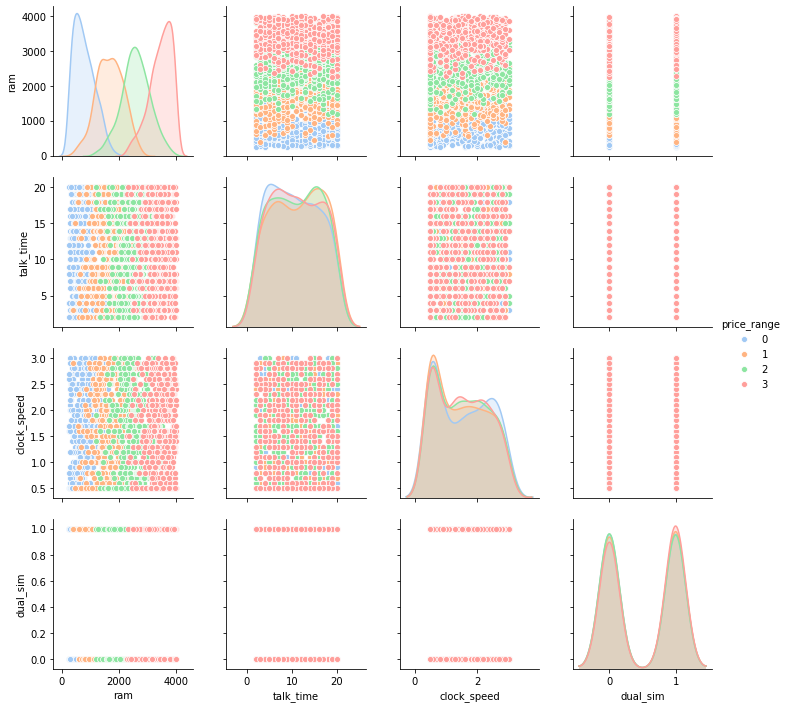

In [2]:
#2) Visualizing variance of price_range (0,1,2,or 3) w/r/t:
# a. ram
# b. talk_time
# c. clock_speed
# d. dual_sim

#subsetting data to relevant portions of test data.
comps = ['ram','talk_time','clock_speed','dual_sim']
pairs_plot = sns.pairplot(df_train, vars= comps , hue = 'price_range', palette= 'pastel')



[Text(0.5, 1.0, 'Price Range Value versus RAM in mb')]

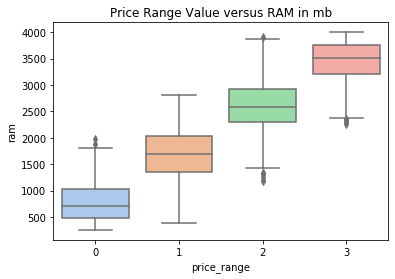

In [3]:

ram_box = sns.boxplot(data = df_train, x = 'price_range', y='ram', palette = 'pastel')
ram_box.set(title = 'Price Range Value versus RAM in mb')


[Text(0.5, 1.0, 'Price Range Value versus Talk Time')]

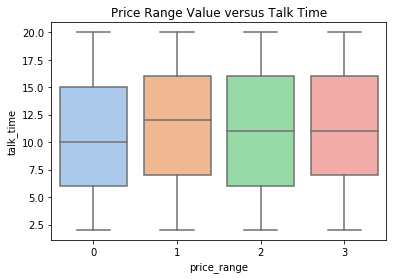

In [4]:
talk_box = sns.boxplot(data = df_train, x = 'price_range', y='talk_time', palette = 'pastel')
talk_box.set(title = 'Price Range Value versus Talk Time')

[Text(0.5, 1.0, 'Price Range Value versus Clock Speed')]

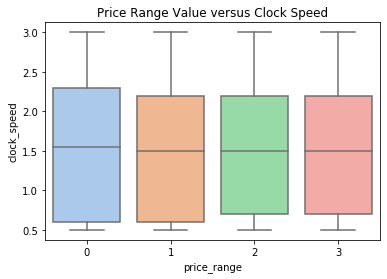

In [5]:
clock_box = sns.boxplot(data = df_train, x = 'price_range', y='clock_speed', palette = 'pastel')
clock_box.set(title = 'Price Range Value versus Clock Speed')


[Text(0.5, 1.0, 'Frequency of Dual Sim Presence, Categorized by Price Range')]

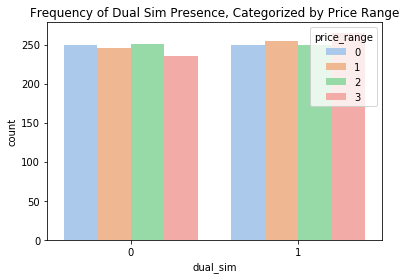

In [6]:
dsim_plot = sns.countplot(data= df_train, x = 'dual_sim', hue = 'price_range', palette= 'pastel')
dsim_plot.set(title='Frequency of Dual Sim Presence, Categorized by Price Range')

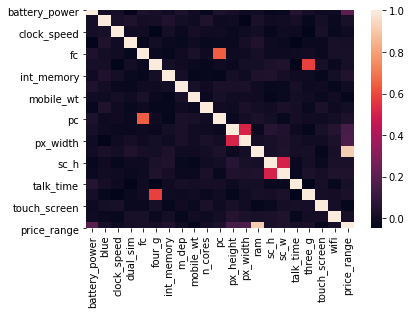

In [7]:
#correlations matrix, pairwise betw. all features

corr_mat = df_train.corr()

sns.heatmap(corr_mat)

(-0.25, 1.0)

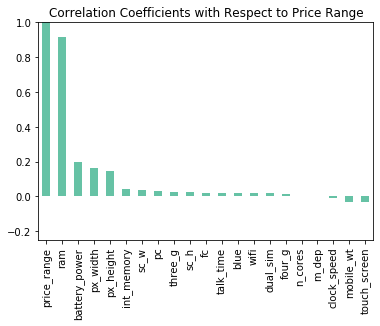

In [8]:
corr_price = df_train.corrwith(df_train['price_range']).sort_values(ascending = False)
cp_plot = corr_price.plot(kind = 'bar', colormap = "Set2",
title = "Correlation Coefficients with Respect to Price Range")
cp_plot.set_ylim(-0.25,1.0)



a) The correlations between these variables are the strength of association between values of each feature and that of Price_Range. This is plainly visible in that the correlation between price_range and itself is 1.0 .

b) If the sign of correlation between A and B is positive, A tends to increase as B increases. If the sign of correlation between A and B is negative, A tends to decrease as B increases.

[Text(0.5, 0, 'Predicted Price Range Value via Random Forest Ensemble')]

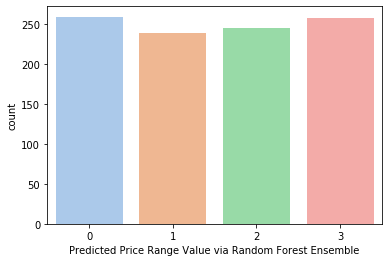

In [9]:
#4) i) Building a Random Forest model to train a classifier to predict price_range given all features of test data:

from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import linear_model

#since we have mixed types of data (boolean, numerical, etc.) a tree model seems appropriate.

training_X = (df_train.drop(['price_range'], axis = 1))

training_y = df_train['price_range']
testing_X = df_test.drop('id', axis =1)

rfc = RandomForestClassifier(n_estimators=100, random_state=0)#set number of estimators
rfc.fit(training_X.values,training_y)

y_rfc_ests = (rfc.predict(testing_X))

df_pred = pd.DataFrame(testing_X)


rfc_plt = sns.countplot(y_rfc_ests, palette = 'pastel')
rfc_plt.set(xlabel = "Predicted Price Range Value via Random Forest Ensemble")




[Text(0.5, 0, 'Predicted Price Range Value via Multilayer Perceptron')]

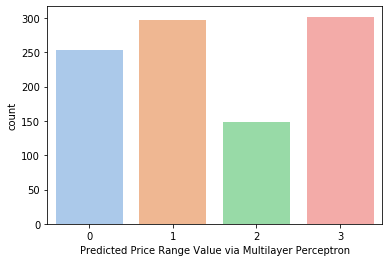

In [10]:
#4) ii) Using multilayer perceptron classifier from SKlearn

from sklearn.neural_network import MLPClassifier


training_X = (df_train.drop(['price_range'], axis = 1))
training_y = df_train['price_range']

testing_X = df_test.drop('id', axis =1)

mlp = MLPClassifier()
mlp.fit(training_X,training_y)

y_mlp_ests = (mlp.predict(X = testing_X))

df_mlp = pd.DataFrame(testing_X)

mlp_plt = sns.countplot(y_mlp_ests, palette = 'pastel')
mlp_plt.set(xlabel = "Predicted Price Range Value via Multilayer Perceptron")





[Text(0.5, 0, 'Predicted Price Range Value via K-Nearest Neighbors')]

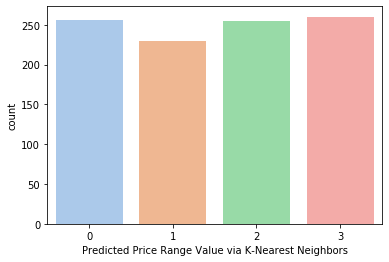

In [11]:
#4) iii) Using KNN model from SKlearn

from sklearn import neighbors


training_X = (df_train.drop(['price_range'], axis = 1))
training_y = df_train['price_range']

testing_X = df_test.drop('id', axis =1)

knn = neighbors.KNeighborsClassifier()
knn.fit(training_X,training_y)

y_knn_ests = (knn.predict(X = testing_X))

df_knn = pd.DataFrame(testing_X)

knn_plt = sns.countplot(y_knn_ests, palette = 'pastel')
knn_plt.set(xlabel = "Predicted Price Range Value via K-Nearest Neighbors")


5. Comparing Training Accuracy:
since no labeled validation data is available, we can use K-fold cross validation on these methods within the Training.csv dataset to assess the models:



[Text(0.5, 1, 'Avg. Confusion Matrix, 10-Fold Stratified Cross-Validated Random Forest Model')]

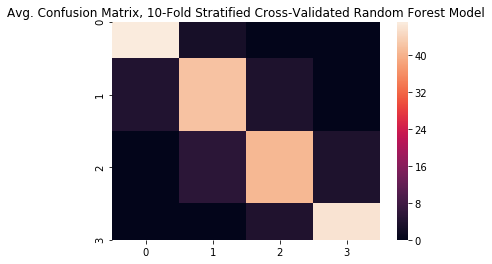

In [12]:
# 5) i): Assessing Random Forest Model:
import sklearn.metrics
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


#our data
X = df_train.drop(['price_range'], axis = 1)
X = np.array(X)
             
y = df_train['price_range']
y = np.array(y)


#our model
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

#cross-validation steps:
    
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

conf_mats = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train,y_train)
    
    y_pred = classifier.predict(X_test)
    conf_mats.append(sklearn.metrics.confusion_matrix(y_test,y_pred))
    
    

avg_conf_mat = np.average( np.array(conf_mats), axis=0 ) #averaging all confusion matrices.
    
hm = sns.heatmap(avg_conf_mat)
hm.set(title = "Avg. Confusion Matrix, 10-Fold Stratified Cross-Validated Random Forest Model")


[Text(0.5, 1, 'Confusion Matrix, 10-Fold Stratified Cross-Validated Multilayer Perceptron')]

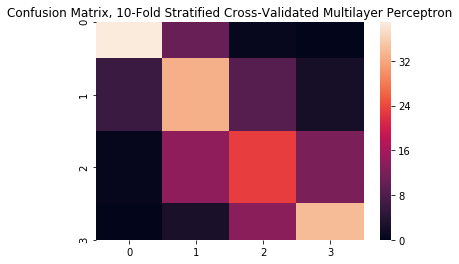

In [13]:
# 5) ii): Assessing Mulilayer Perceptron Model:
import sklearn.metrics
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


#our data
X = df_train.drop(['price_range'], axis = 1)
X = np.array(X)
             
y = df_train['price_range']
y = np.array(y)


#our model
classifier = MLPClassifier()

#cross-validation steps:
    
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

conf_mats = []


#***this snippet courtesy of the following sklearn Example
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train,y_train)
    
    y_pred = classifier.predict(X_test)
    conf_mats.append(sklearn.metrics.confusion_matrix(y_test,y_pred))
#***** end snippet    
    

avg_conf_mat = np.average( np.array(conf_mats), axis=0 ) #averaging all confusion matrices.
    
hm = sns.heatmap(avg_conf_mat)
hm.set(title = "Confusion Matrix, 10-Fold Stratified Cross-Validated Multilayer Perceptron")

[Text(0.5, 1, 'Confusion Matrix, 10-Fold Stratified Cross-Validated KNN Model')]

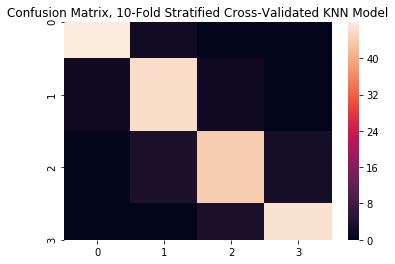

In [14]:
# 5) iii): Assessing Mulilayer Perceptron Model:
import sklearn.metrics
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


#our data
X = df_train.drop(['price_range'], axis = 1)
X = np.array(X)
             
y = df_train['price_range']
y = np.array(y)


#our model
classifier = neighbors.KNeighborsClassifier()

#cross-validation steps:
    
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

#***this snippet courtesy of the following sklearn Example
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
conf_mats = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train,y_train)
    
    y_pred = classifier.predict(X_test)
    conf_mats.append(sklearn.metrics.confusion_matrix(y_test,y_pred))
    
    

avg_conf_mat = np.average( np.array(conf_mats), axis=0 ) #averaging all confusion matrices.
    
hm = sns.heatmap(avg_conf_mat)
hm.set(title = "Confusion Matrix, 10-Fold Stratified Cross-Validated KNN Model")

In [15]:
#6) Visualizing Previous Predictions:
# X_test = pd.DataFrame(testing_X)
# y_rfc_ests = (rfc.predict(testing_X))
# y_mlp_ests = (mlp.predict(X = testing_X))
# y_knn_ests = (knn.predict(X = testing_X))

predictions_df = pd.DataFrame()
predictions_df['sample'] = np.arange(0,1000)
predictions_df['random forest'] = y_rfc_ests
predictions_df['multilayer perceptron'] = y_mlp_ests
predictions_df['K-nearest neighbor']  = y_knn_ests

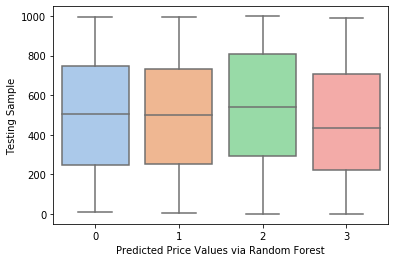

In [16]:

ax1 = sns.boxplot(data=predictions_df, y = 'sample', x = 'random forest',palette = 'pastel')
ax1.set(xlabel = 'Predicted Price Values via Random Forest',ylabel = 'Testing Sample')
ax1


[Text(0, 0.5, 'Testing Sample'),
 Text(0.5, 0, 'Predicted Price Values via Multilayer Perceptron')]

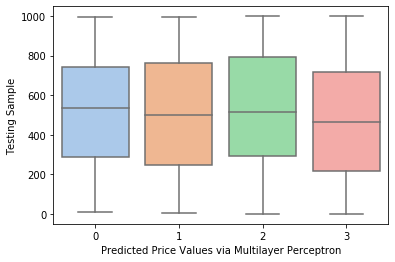

In [17]:
ax2 = sns.boxplot(data=predictions_df, y = 'sample', x = 'multilayer perceptron',palette = 'pastel')
ax2.set(xlabel = 'Predicted Price Values via Multilayer Perceptron', ylabel = 'Testing Sample')


[Text(0, 0.5, 'Testing Sample'),
 Text(0.5, 0, 'Predicted Price Values via K-Nearest Neighbor')]

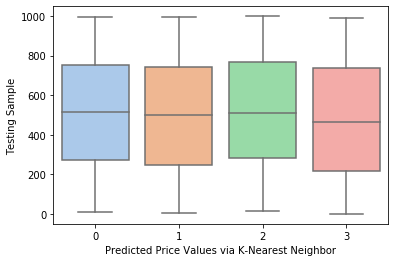

In [18]:
ax3 = sns.boxplot(data=predictions_df, y = 'sample', x = 'K-nearest neighbor',palette = 'pastel')
ax3.set(xlabel = 'Predicted Price Values via K-Nearest Neighbor', ylabel = 'Testing Sample')